<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-1">Hierarchical Clustering</a></span></li><li><span><a href="#By-The-End-Of-This-Session-You-Should-Be-Able-To:" data-toc-modified-id="By-The-End-Of-This-Session-You-Should-Be-Able-To:-2">By The End Of This Session You Should Be Able To:</a></span></li><li><span><a href="#How-should-we-group-these-letters?" data-toc-modified-id="How-should-we-group-these-letters?-3">How should we group these letters?</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-4">Hierarchical Clustering</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-5">Hierarchical Clustering</a></span></li><li><span><a href="#Hierarchical-Clustering-Algoritm" data-toc-modified-id="Hierarchical-Clustering-Algoritm-6">Hierarchical Clustering Algoritm</a></span></li><li><span><a href="#How-should-we-define-distance-between-clusters?" data-toc-modified-id="How-should-we-define-distance-between-clusters?-7">How should we define distance between clusters?</a></span></li><li><span><a href="#Different-Linkage-choices-will-result-in-different-Hierarchical-Clustering" data-toc-modified-id="Different-Linkage-choices-will-result-in-different-Hierarchical-Clustering-8">Different Linkage choices will result in different Hierarchical Clustering</a></span></li><li><span><a href="#Worked-Example-of-Hierarchical-Clustering" data-toc-modified-id="Worked-Example-of-Hierarchical-Clustering-9">Worked Example of Hierarchical Clustering</a></span></li><li><span><a href="#Let's-Cluster-Whiskeys" data-toc-modified-id="Let's-Cluster-Whiskeys-10">Let's Cluster Whiskeys</a></span></li><li><span><a href="#2-methods-of-Hierarchical-Clustering" data-toc-modified-id="2-methods-of-Hierarchical-Clustering-11">2 methods of Hierarchical Clustering</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-12">Takeaways</a></span></li><li><span><a href="#-Bonus-Material" data-toc-modified-id="-Bonus-Material-13"> Bonus Material</a></span></li><li><span><a href="#Using-Hierarchical-Clustering-understand-Multi-collinearity-in-Feature-Importance" data-toc-modified-id="Using-Hierarchical-Clustering-understand-Multi-collinearity-in-Feature-Importance-14">Using Hierarchical Clustering understand Multi-collinearity in Feature Importance</a></span></li><li><span><a href="#How-should-we-evaluate-different-linkages?" data-toc-modified-id="How-should-we-evaluate-different-linkages?-15">How should we evaluate different linkages?</a></span></li></ul></div>

<center><h2>Hierarchical Clustering</h2></center>
<br>
<br>

<center><img src="https://en.proft.me/media/science/r_hc_tree.png" width="55%"/></center>

By The End Of This Session You Should Be Able To:
----

- Define Hierarchical Clustering in your words
- Plot Hierarchical Clustering with a dendrogram
- Explain the difference between Agglomerative and Divisive Hierarchical Clustering

<center><h2>How should we group these letters?</h2></center>
<br><br>
<center><img src="../images/letters-ungrouped.png" width="75%"/></center>

<center><h2>Hierarchical Clustering</h2></center>
<br>
<center><table><tr><td><img src='../images/letters-grouped.png' width="110%"></td><td><img src='../images/letters-dendrogram.png' width="100%"></td></tr></table></center>
<center><img src="../images/Hierarchical_groups.png" width="75%"/></center>




Hierarchical Clustering
----

Clustering data points into larger and larger groups.

Group data points as leaves on a tree. 

Hierarchical Clustering Algoritm
-----


1. Assign each point to its own cluster
1. Repeat:
    1. Compute distances between clusters
    1. Merge closest clusters
1. Until all "distant" clusters are merged

We do not specify the number of clusters beforehand. 

We build up the clusters __agglomeratively__, then we can choose whatever level of clustering we want afterward.

How should we define distance between clusters?
------

It's easy to measure the distance between two points, but between clusters it's not as easy. 

__Linkage__: A distance metric between clusters


 <center><img src="../images/linkages.png" width="90%"/></center>

Different Linkage choices will result in different Hierarchical Clustering
------
<br>
<center><img src="../images/linkage_dendrograms.png" width="85%"/></center>



<center><h2>Worked Example of Hierarchical Clustering</h2></center>
<br>
<center><img src="../images/example_hierachical.png" width="75%"/></center>

1. Start with each data object separate
1. Make clusters
    1. Find smallest distance between objects
    1. Make cluster
    1. Each cluster becomes a data object
1. Stop when all objects are in single cluster
1. Threshold to number of clusters

<center><h2>Let's Cluster Whiskeys</h2></center>

<center><img src="../images/whiskey.jpg" width="75%"/></center>

In [1]:
reset -fs

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/sweis/whiskies/master/whiskies.txt')
df.tail(n=1)

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850


In [3]:
# Drop columns to make the problem simpler
columns_to_drop = ['RowID', 'Postcode', 'Latitude', 'Longitude']
df.drop(columns_to_drop, axis=1, inplace=True)

In [4]:
# Let's make the index something nice, so we can use it later as a label
df.set_index('Distillery', inplace=True) 

In [20]:
# Use scipy implementation to make it easier to visualize
from scipy import cluster, spatial

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
palette = "Dark2"
%matplotlib inline

In [21]:
def make_dendrogram(dataframe, linkage_method, metric, color_threshold=None):
    distxy    = spatial.distance.squareform(spatial.distance.pdist(dataframe.values, metric=metric))
    h_cluster = cluster.hierarchy.linkage(distxy, linkage_method)
    plt.figure(figsize=(25, 10));plt.title('Hierarchical Clustering Dendrogram'); plt.ylabel('distance') # plt.xlabel('sample index')
    scipy.cluster.hierarchy.dendrogram(h_cluster,
                                       leaf_rotation=90.,   # Rotates the x axis labels
                                       leaf_font_size=12.,  # Font size for the x axis labels
                                       labels=dataframe.index,
                                       color_threshold=color_threshold)

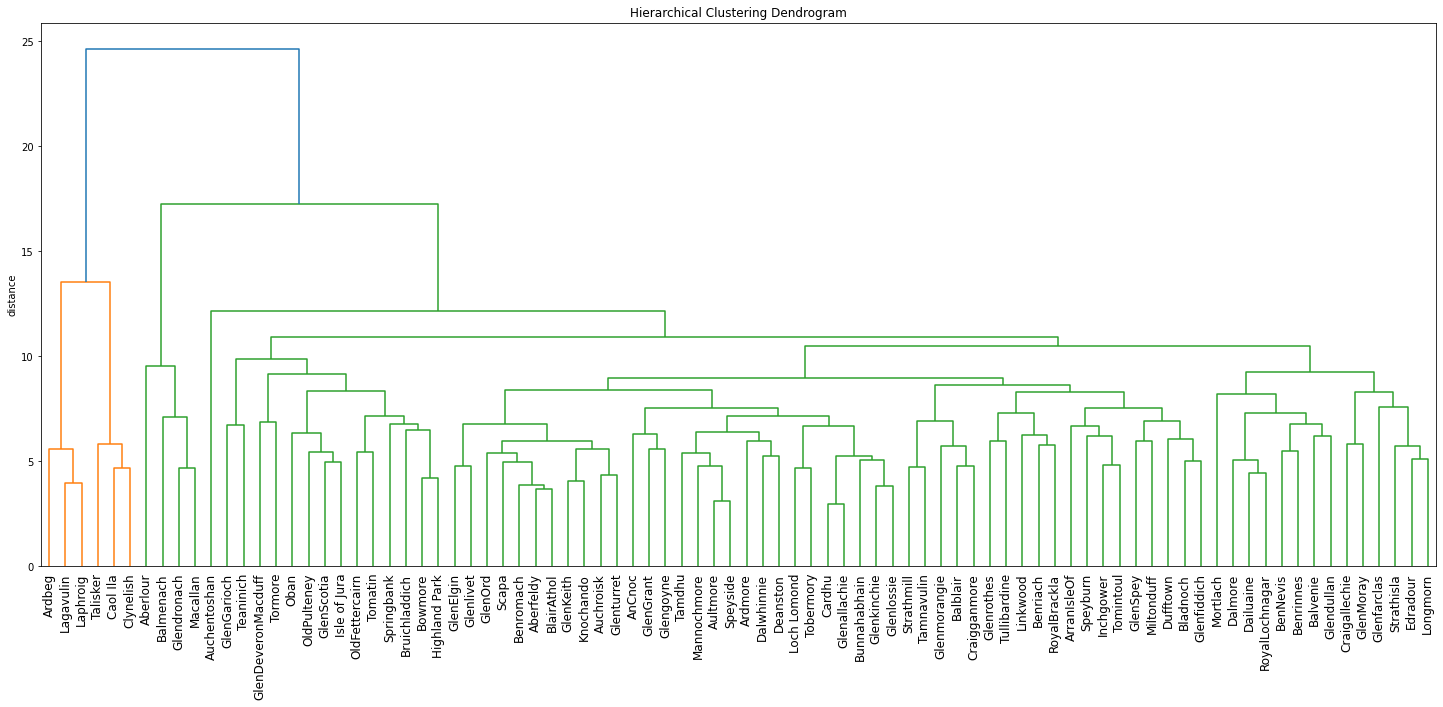

In [22]:
# Student Questions
# Which linkage should we use?
# Which distance metric do we use?
make_dendrogram(df, 
                linkage_method='average', 
                metric='euclidean')

<center><h2>2 methods of Hierarchical Clustering</h2></center>

1.  Agglomerative / "bottom up" 

    Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
<br><br>
2. Divisive / "top down"

   All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

<center><img src="https://www.saedsayad.com/../images/Clustering_h1.png" width="100%"/></center>


<center><h2>Takeaways</h2></center>

1. Clustering is grouping similar data together.
1. Often times, creating a hierarchy helps group data.
1. Build groups bottom-up (agglomerative)
1. Build groups top-down (Divisive)

 Bonus Material
-----

<center><h2>Using Hierarchical Clustering understand Multi-collinearity in Feature Importance</h2></center>

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

How should we evaluate different linkages?
-----

Same as other clustering (e.g., minimal increase sum of squares or minimal increase of variance )

Source: https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering